In [1]:
import glob
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper', font_scale=3.0)

# Concatanate the data 
<a id='concat'></a>

In [222]:
# Set which param
delay_mode_intra = "null"
delay_mode_inter = "unimodal"
intra_params = [1.5]
inter_params = [1.5]
v_stim = 4.0
metric = "training"  # statistics or classification?
networks = ["topo", "random"]

# Control condition
dfs = []
df = pd.read_csv('data/sum/diff_v_stim/{}_v_stim.csv'.format(metric), keep_default_na=False)

df = df[df['v_stim']==v_stim].drop(columns=['v_stim'])  # only those with v_stim=4
df["intra type"] = delay_mode_intra
df["inter type"] = delay_mode_inter
df["intra params"] = "null"
df["inter params"] = "null"
df['double conn'] = 'null'
df['skip delays'] = 'null'
df['skip weights'] = 'null'
dfs.append(df)

# add all the other datas
for network_mode in networks:
    for intra_p in intra_params:
        for inter_p in inter_params:
            # skip connections params
            for skip_double in [str(True), str(False)]:
                for skip_p in [1.5, 3.0]:
                    for skip_w in [1.0, 0.5]:
                        df = pd.read_csv('data/sum/{}_{}_intra={}{}_inter={}{}_skip_double={}_d={}_w={}.csv'.
                                         format(metric, network_mode, delay_mode_intra, intra_p, delay_mode_inter, inter_p, skip_double, skip_p, skip_w))
                        df["intra type"] = delay_mode_intra
                        df["inter type"] = delay_mode_inter
                        df["intra params"] = intra_p
                        df["inter params"] = inter_p
                        df['double conn'] = skip_double
                        df['skip delays'] = skip_p
                        df['skip weights'] = skip_w
                        dfs.append(df)

# # noise condition does not depend on v_stim
# df = pd.read_csv('data/sum/pre/{}_intra={}_inter={}.csv'.format(metric, delay_mode_intra, delay_mode_inter),
#                  keep_default_na=False)
# df = df[df['network type']=='noise']
# dfs.append(df)

# concatenate all dataframes into one and save them
ultimate = pd.concat(dfs, sort=False)
ultimate.to_csv("data/sum/{}_intra={}_inter={}.csv".format(metric, delay_mode_intra, delay_mode_inter), index=False)

# Plot
<a id='load'></a>

## Load

1) Load the data

In [289]:
df = pd.read_csv('data/sum/v_stim=4/measures_intra=null_inter=unimodal.csv', keep_default_na=False)

2) melt them in a necessary format

In [290]:
melted = df.melt(id_vars=['module index', 'network type', 
                          'intra type', 'inter type', 'intra params', 'inter params'],
#                           'double conn', 'skip delays', 'skip weights'], 
                 var_name='metric')  # id_vars keep their column, other columns get melted under the column @var_name

3) Select which variables you want to plot

In [291]:
# selected = melted[(melted['module index']>1) & (melted['metric']=='accuracy')]
selected = melted[(melted['metric']=='irregularity') &
                  (melted['network type']!='noise')]

In [292]:
rename = 'inter params'
name_to = '$\sigma_{ff}$'
selected = selected.rename(columns={rename:name_to}, errors='raise')

# selected[name_to] = selected[name_to].replace('null', 0)  # map params to 0
# # selected[name_to] = pd.to_numeric(selected[name_to], errors='raise')  # make the hue variable numeric
# selected[name_to] = selected[name_to].map({'True':'double', 'False':'single', 'null':'none'})  # skip connections

In [293]:
selected

,module index,network type,intra type,inter type,intra params,$\sigma_{ff}$,metric,value
240,0.0,topo,null,unimodal,null,null,irregularity,1.480663
241,1.0,topo,null,unimodal,null,null,irregularity,1.500693
242,2.0,topo,null,unimodal,null,null,irregularity,1.327287
243,3.0,topo,null,unimodal,null,null,irregularity,1.170548
244,0.0,topo,null,unimodal,null,null,irregularity,1.493682
...,...,...,...,...,...,...,...,...
395,3.0,random,null,unimodal,1.5,10.0,irregularity,1.492969
396,0.0,random,null,unimodal,1.5,10.0,irregularity,1.490509
397,1.0,random,null,unimodal,1.5,10.0,irregularity,1.571516
398,2.0,random,null,unimodal,1.5,10.0,irregularity,1.541875


## Network dynamics
<a id='dynamics'></a>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

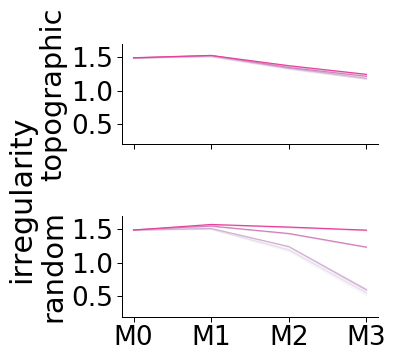

In [295]:
plt.rcParams.update({'font.size': 30})

g = sns.FacetGrid(selected, row="network type",
                  sharex=True, sharey='col', margin_titles=False, aspect=2)
my_pal = sns.color_palette(sns.color_palette("PuRd"), 4)  # Oranges, "ch:2.5,-.2,dark=.1"
g = g.map_dataframe(sns.lineplot, "module index", 'value', hue=name_to, palette=my_pal, legend=False)

# # ticks and labels
# metrics = df.columns[1:] 
# xticks = [None, 'M0', 'M1',"M2", "M3"]
# ylabels = ["Pearson CC", "LvR", "spikes/sec", "Fano factor"]  # ylabels are units of metrics

# # ticks and labels
# # https://cduvallet.github.io/posts/2018/11/facetgrid-ylabel-access
# for ax in g.axes.flat:
#     ax.set(xlabel=None, xticklabels=xticks, ylabel=None)
#     if ax.get_title():
#         ax.set_title(ax.get_title().split('=')[1])
#     if ax.texts:
#         txt = ax.texts[0]
#         ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
#                 txt.get_text().split('=')[1],
#                 transform=ax.transAxes,
#                 va='center')
#         # Remove the original text
#         ax.texts[0].remove()
# # ylabel for metrics
# for axi,ax in enumerate(g.axes[0]):
#     ax.set(ylabel=ylabels[axi])
    

# ticks, labels...
# g.fig.suptitle(name_to)
g.set(xlabel=None, xticks=range(4), xticklabels=[], ylabel=None, title=None, ylim=[0.2,1.7])

g.fig.text(0, 0.5, 'irregularity', va='center', rotation='vertical')
namelist = ['topographic', 'random']
for i,ax in enumerate(g.axes):
    ax[0].set_ylabel(namelist[i])

xticks= ['M0', 'M1', 'M2', 'M3']
g.axes[1,0].set(xticks=range(4), xticklabels=xticks)
    

# # legends
# handles, labels = g.axes[0][-1].get_legend_handles_labels()
# g.axes[0][-1].legend(handles=handles[1:3], labels=labels[1:3], bbox_to_anchor=(0.1, 0.2))
# g.axes[0][-1].legend(handles=handles[1:], labels=labels[1:], bbox_to_anchor=(0.1, 0.2), 
#                      ncol=2, handlelength=0.5, columnspacing=0.3, borderpad=0.2)

# save the figure
# plt.tight_layout()
plt.savefig("irr_nulluni.eps", bbox_to_inches="tight")

## Classification
<a id='classi'></a>

4-1) Plot with FacetGrid

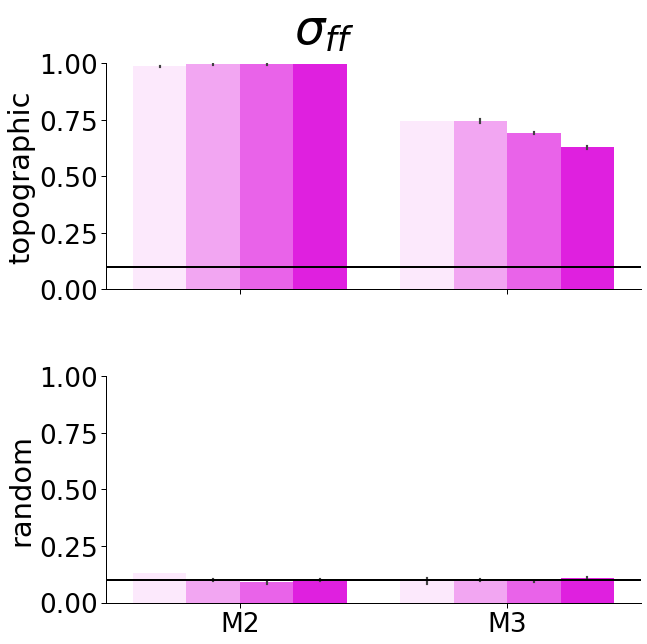

In [91]:
plt.rcParams.update({'font.size': 40})
# create a 2x2 grid with row being the [accuracy, MSE] and column being [topo, random]
g = sns.catplot(x="module index", y="value", hue=name_to, data = selected,
            kind='bar', row='network type', sharey='row', margin_titles=False,
            ci='sd', aspect=2.0, color='magenta', legend=False)

# handles, legends = g.axes[0][0].get_legend_handles_labels()  # set legent to 'brief' to get handles and legends than turn off
# g.axes[1][0].legend(handles, legends, bbox_to_anchor=(0.6,0.3))

# ticks, labels...
g.fig.suptitle(name_to)
g.set(xlabel=None, xticks=[], ylabel=None, title=None, ylim=[0,1.0])
# g.fig.text(0, 0.5,'accuracy', va='center', rotation='vertical')
namelist = ['topographic', 'random']
for i,ax in enumerate(g.axes):
    ax[0].axhline(y=0.1, color='black', linewidth=2.0)
    ax[0].set_ylabel(namelist[i])
xticks= ['M2', 'M3']
g.axes[1,0].set(xticks=range(2), xticklabels=xticks)


# https://wckdouglas.github.io/2016/12/seaborn_annoying_title
# xticks = ["M2", "M3"]
# g.set(xlabel=None)
# for ax in g.axes[0]:
#     ax.set(xticks=range(2), xticklabels=xticks)
#     ax.axhline(y=0.1, color='black', linewidth=2.0)  # accuracy of 0.1 is at chance level
# for ax in g.axes.flat:
#     ax.set(xlabel=None, xticklabels=xticks, ylabel=None)
#     if ax.get_title():
#         ax.set_title(ax.get_title().split('=')[1],
#                      fontsize='x-large')
#     if ax.texts:
#         txt = ax.texts[0]
#         ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
#                 txt.get_text().split('=')[1],
#                 transform=ax.transAxes,
#                 va='center',
#                 fontsize='x-large')
#         # Remove the original text
#         ax.texts[0].remove()

# save the figure
# g.fig.tight_layout()
plt.savefig('acc_nulluni.eps', bbox_to_inches='tight')

4-2) Or only just a single plot

In [ ]:
sns.barplot(x='module index', y='accuracy', hue='double conn', data=df[(df['module index'] >1) & (df['network type']=='random')])

xticks = ["M2", "M3"]
plt.xticks(range(2), xticks)
plt.axhline(y=0.1, color='black', linewidth=2.0)

plt.savefig('training_random_double.pdf', bbox_to_inches='tight')

# Errthing
<a id='compare'></a>

In [2]:
'''
load data, compute average across trials and merge statistics with classification results
'''
measures = pd.read_csv('data/measures_errthing.csv', keep_default_na=False)
classi = pd.read_csv('data/training_errthing.csv', keep_default_na=False)
groupy = lambda df:df.groupby(['module index', 'network type', 'intra type', 'inter type', 'intra params', 'inter params']).mean()
measures_g = groupy(measures)
classi_g = groupy(classi)
df_joined = classi_g.join(measures_g, lsuffix='!')

In [3]:
selected = df_joined.loc[(2,'random')]  # M2 of random network
selected = selected.reset_index()  # delete multiIndex structure

def transform_rows_delay (row):
    '''
    aux function to use combinations of intra type and inter type to determine the delay type
    '''
    if (row['intra params']=='null'):
        return 'null'
    elif (row['intra type']=='null') and (row['inter type']=='unimodal'):
        return 'inter'
    elif (row['intra type']=='unimodal') and (row['inter type']=='null'):
        return 'intra'
    else:
        return 'both'

selected['delay type'] = selected.apply(lambda row:transform_rows_delay(row), axis=1)  # add the delay type column
selected = selected.drop(columns=['intra type', 'inter type'])  # drop redundant columns
# selected['delay params'] = selected.apply(lambda row:trasform_rows_params(row), axis=1)
# selected = selected.drop(columns=['intra params', 'inter params'])

In [4]:
selected

,intra params,inter params,Unnamed: 0!,accuracy,MSE,Unnamed: 0,synchrony,irregularity,firing rate,variability,delay type
0,1.5,0.5,44.5,0.1005,0.360033,110,0.083175,1.242206,3.170182,8.435313,inter
1,1.5,10.0,60.5,0.0980,0.360090,150,0.010910,1.532495,2.916002,1.251371,inter
2,1.5,5.0,52.5,0.0890,0.360089,130,0.031001,1.436319,2.950268,4.298904,inter
3,null,null,12.5,0.1305,0.359415,30,0.102346,1.192047,3.393392,10.045327,null
4,0.5,1.5,44.5,0.1015,0.360152,110,0.074555,1.251966,3.078592,6.742603,intra
5,10.0,1.5,60.5,0.2970,0.343846,150,0.337375,0.632046,7.948538,38.530370,intra
6,5.0,1.5,52.5,0.3120,0.342377,130,0.225493,0.744249,5.934898,25.848010,intra
7,null,null,12.5,0.1305,0.359415,30,0.102346,1.192047,3.393392,10.045327,null
8,0.5,0.5,44.5,0.0955,0.360108,110,0.062544,1.260764,3.076788,6.178627,both
9,10.0,10.0,60.5,0.2310,0.354286,150,0.069831,0.997593,4.121390,11.948267,both


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


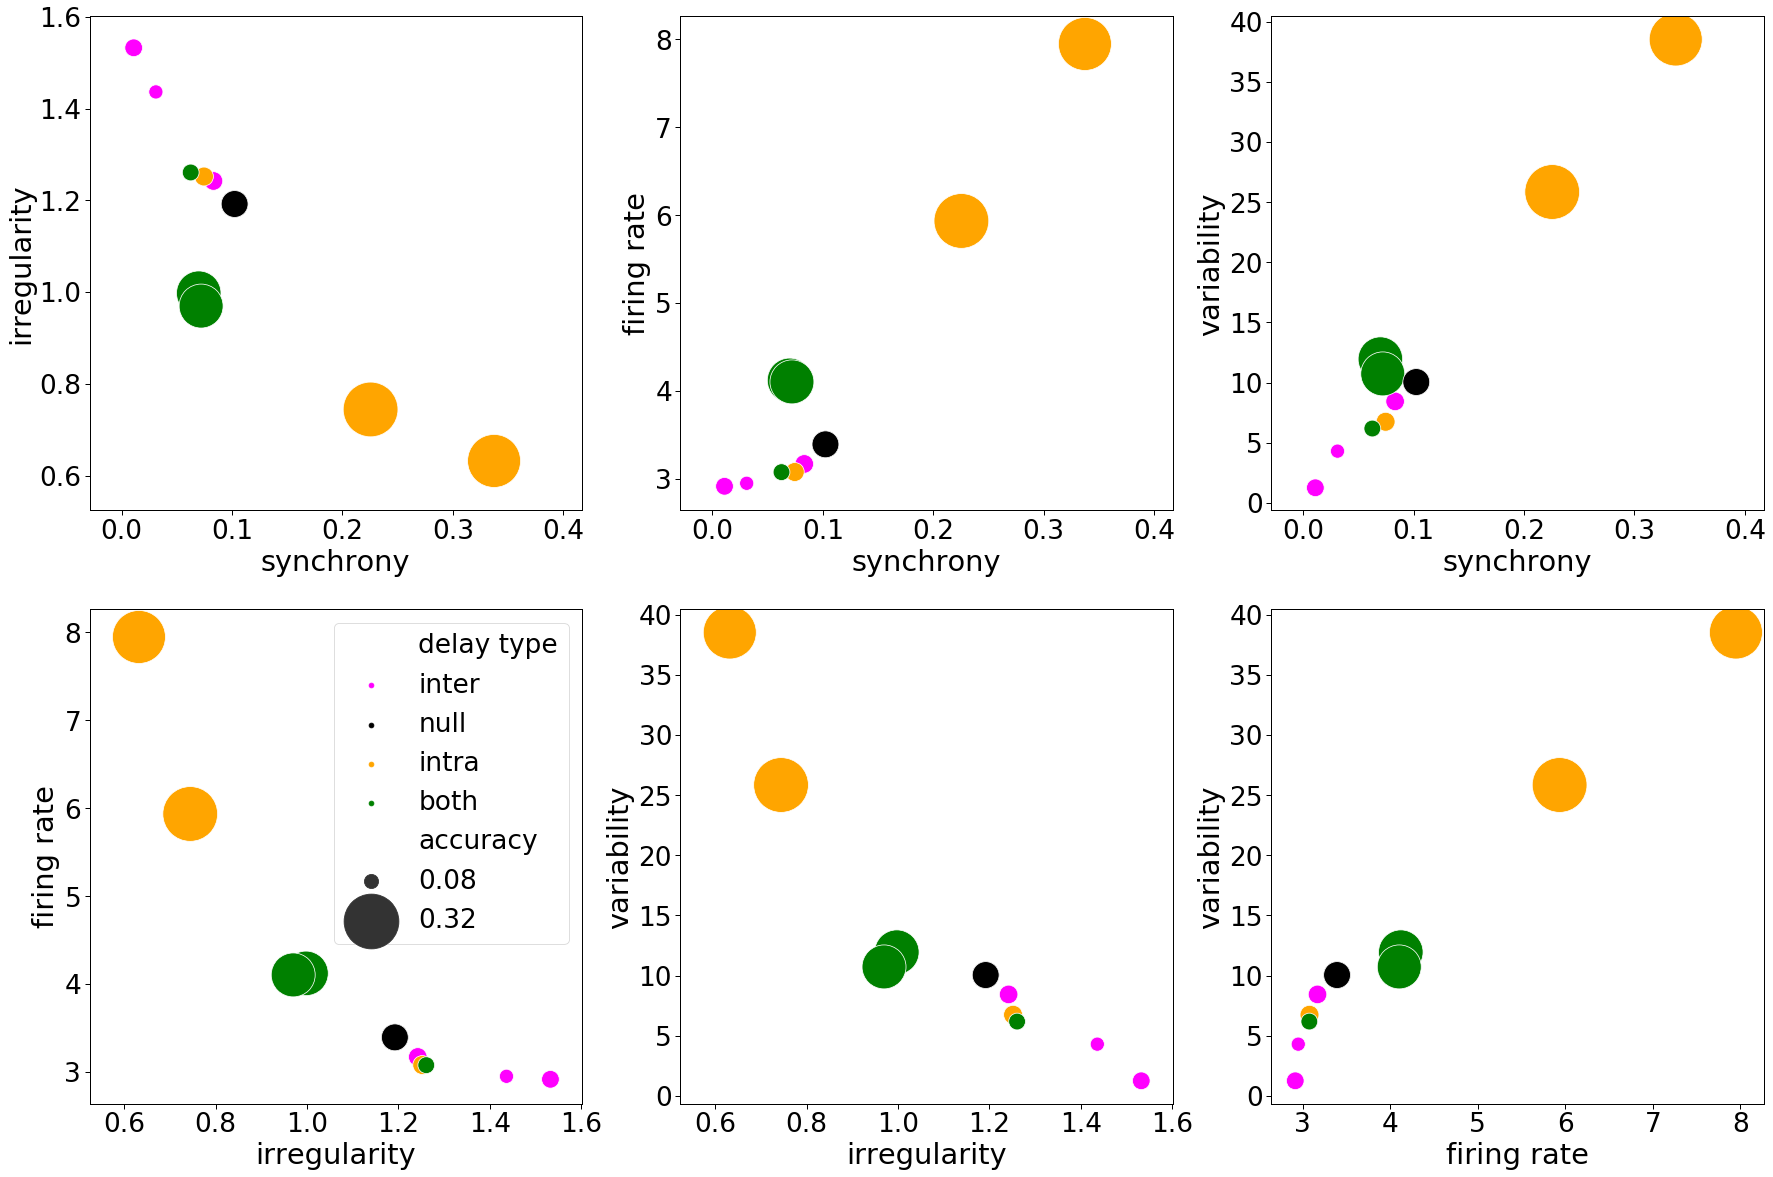

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=3 ,figsize=(30,20))
plt.rcParams["legend.markerscale"] = 1.0
import itertools
metriclist = list(itertools.combinations(['synchrony', 'irregularity', 'firing rate', 'variability'], r=2))
for index,pair in enumerate(metriclist):
    ri = index//3
    ci = index%3
    sns.scatterplot(x=pair[0], y=pair[1], size='accuracy', hue='delay type', data=selected,
                sizes=(200,3000), palette=['magenta','black','orange','green'], ax=axes[ri][ci], legend='brief')

# dirty way to handle legend    
h1,l1 = axes[-1][-1].get_legend_handles_labels()
for index in range(6):  # remove all legends
    ri = index//3
    ci = index%3
    axes[ri][ci].get_legend().remove()
handles = h1[0:6]
labels = l1[0:6]
handles.append(h1[6])
labels.append(l1[6])
handles.append(h1[-1])
labels.append(l1[-1])
axes[-1][0].legend(handles, labels)

plt.savefig('dynamic_accuracy_color.eps', bbox_to_inches='tight')